# Regression and Classification Notebook

This notebook demonstrates how to perform regression and classification tasks using various machine learning algorithms.

## Additional Notes

- Ensure that the virtual environment (`venv/`) is activated before running the notebook.
- Install any required dependencies using `pip install -r requirements.txt`if replicating another environment.


**Load the Data:**
   - Ensure that the required datasets are available in the `data/` directory.
   - Load the datasets using pandas
   - Check variable names with df.columns df[''] which invokes column names to choose


In [ ]:
import pandas as pd
import numpy as np

# df = pd.read_excel('data/concrete_force.xls')
df = pd.read_csv('data/concrete_force.csv', header=0)
df.head()
# df.columns # shows column names
## type df[''] to see list of columns
# df['Cement (component 1)(kg in a m^3 mixture)'] 

**Split the Data:**
   - Split the data into training and testing sets.
   - Use a suitable ratio, such as 80% training and 20% testing.

**Model Selection:**
   - Choose appropriate regression and classification algorithms.
   - Examples include Linear Regression, Decision Trees, Random Forest, SVM, etc.

**Training the Model:**
   - Train the selected models using the training data.
   - Tune hyperparameters using techniques such as Grid Search or Random Search. This means creating several models by changing parameters (e.g., depth of the tree) randomly or in a grid

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

linear_model = LinearRegression()
X = df[df.columns[:-1]]
y = df['Concrete compressive strength(MPa, megapascals) ']
linear_model.fit(X, y)
y_pred = linear_model.predict(X)

residuals = y - y_pred


**Model Evaluation:**
   - Evaluate the models using the testing data.
   - Use metrics such as Mean Squared Error (MSE) for regression and Accuracy, Precision, Recall, F1-Score for classification.

**Model Interpretation:**
   - Interpret the results and understand the model's performance.
   - Visualize important features and their impact on the predictions.


In [ ]:
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = linear_model.score(X, y)
r2_adjusted = 1 - ((1 - r2) * (len(y) - 1) / (len(y) - X.shape[1] - 1))
print(f"Mean Squared Error: {rmse}")
print(f"R^2: {r2}")
print(f"Adjusted R^2: {r2_adjusted}")

Mean Squared Error: 10.353609808895648
R^2: 0.6155198704142721
Adjusted R^2: 0.6125072934929344


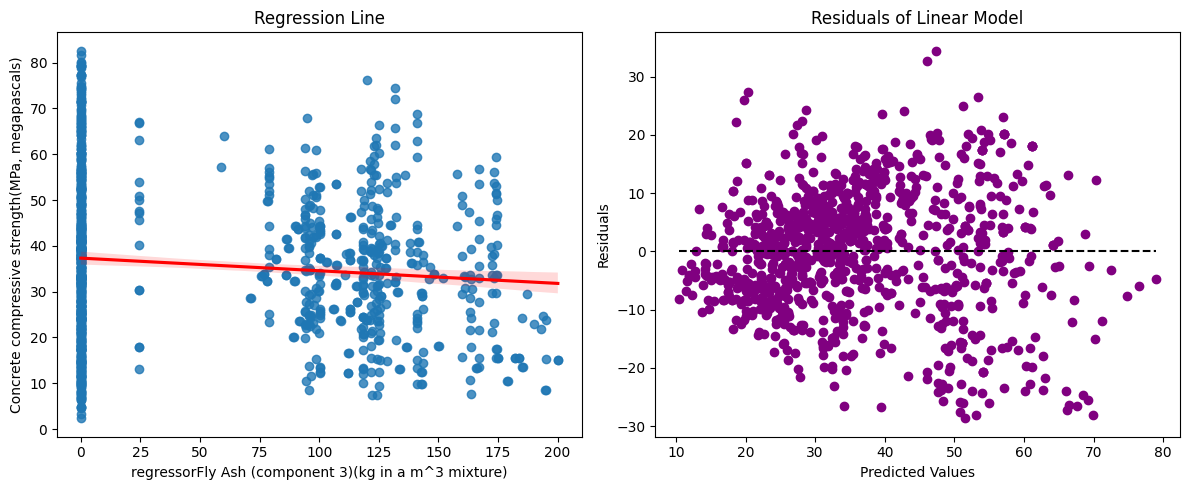

In [ ]:
# plotting the regression line for one of the variables
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
regressor = df['Fly Ash (component 3)(kg in a m^3 mixture)']
sns.regplot(x=regressor, y='Concrete compressive strength(MPa, megapascals) ', data=df, line_kws={"color": "red"})
plt.title('Regression Line')
plt.xlabel(f'regressor{regressor.name}')
plt.ylabel('Concrete compressive strength(MPa, megapascals)')

# Plotting residuals of the linear model
plt.subplot(1, 2, 2)
plt.scatter(y_pred, residuals, color='purple')
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='black', linestyles='--')
plt.title('Residuals of Linear Model')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

Now we follow a similar approach for classification. We load an existing dataset and train and evaluate a decision tree

In [51]:
from sklearn.datasets import load_iris

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

X = iris_df[iris_df.columns[:-1]]
# y = iris_df[iris_df.columns[-1]]
y = iris_df['target']

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [60]:
decision_tree = DecisionTreeClassifier(
    criterion='gini',
    max_depth=2,
    min_samples_leaf=4,
    random_state=42
)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

Accuracy: 0.9666666666666667


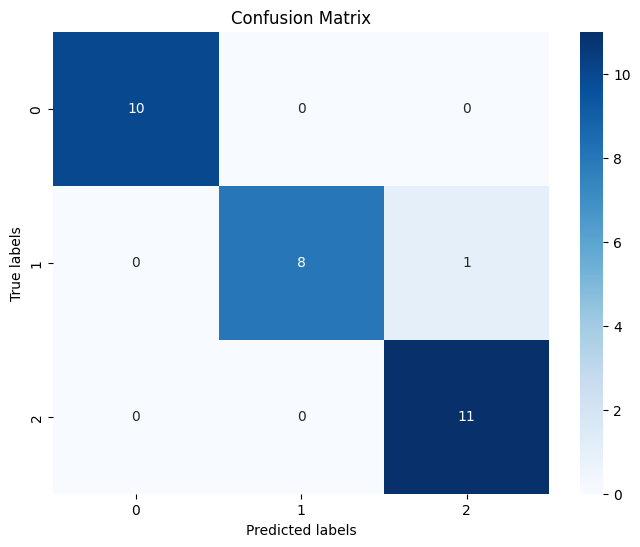

In [61]:
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

We can also show a normalized confusion matrix with percentages instead of counts we can compute the percentages as follows; again we can use a Seaborn heatmap

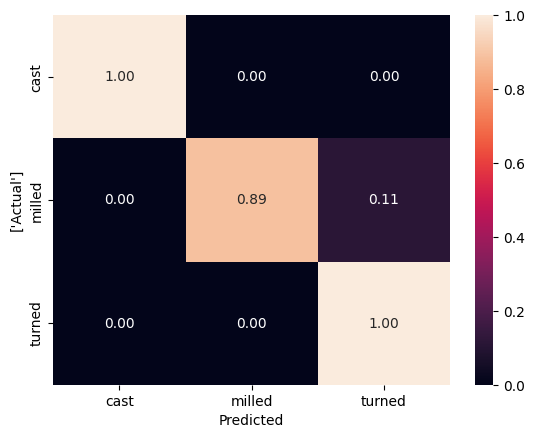

In [62]:
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig= plt.subplots()
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=['cast', 'milled', 'turned'], yticklabels=['cast', 'milled', 'turned'])
plt.ylabel(['Actual'])
plt.xlabel('Predicted')
plt.show()

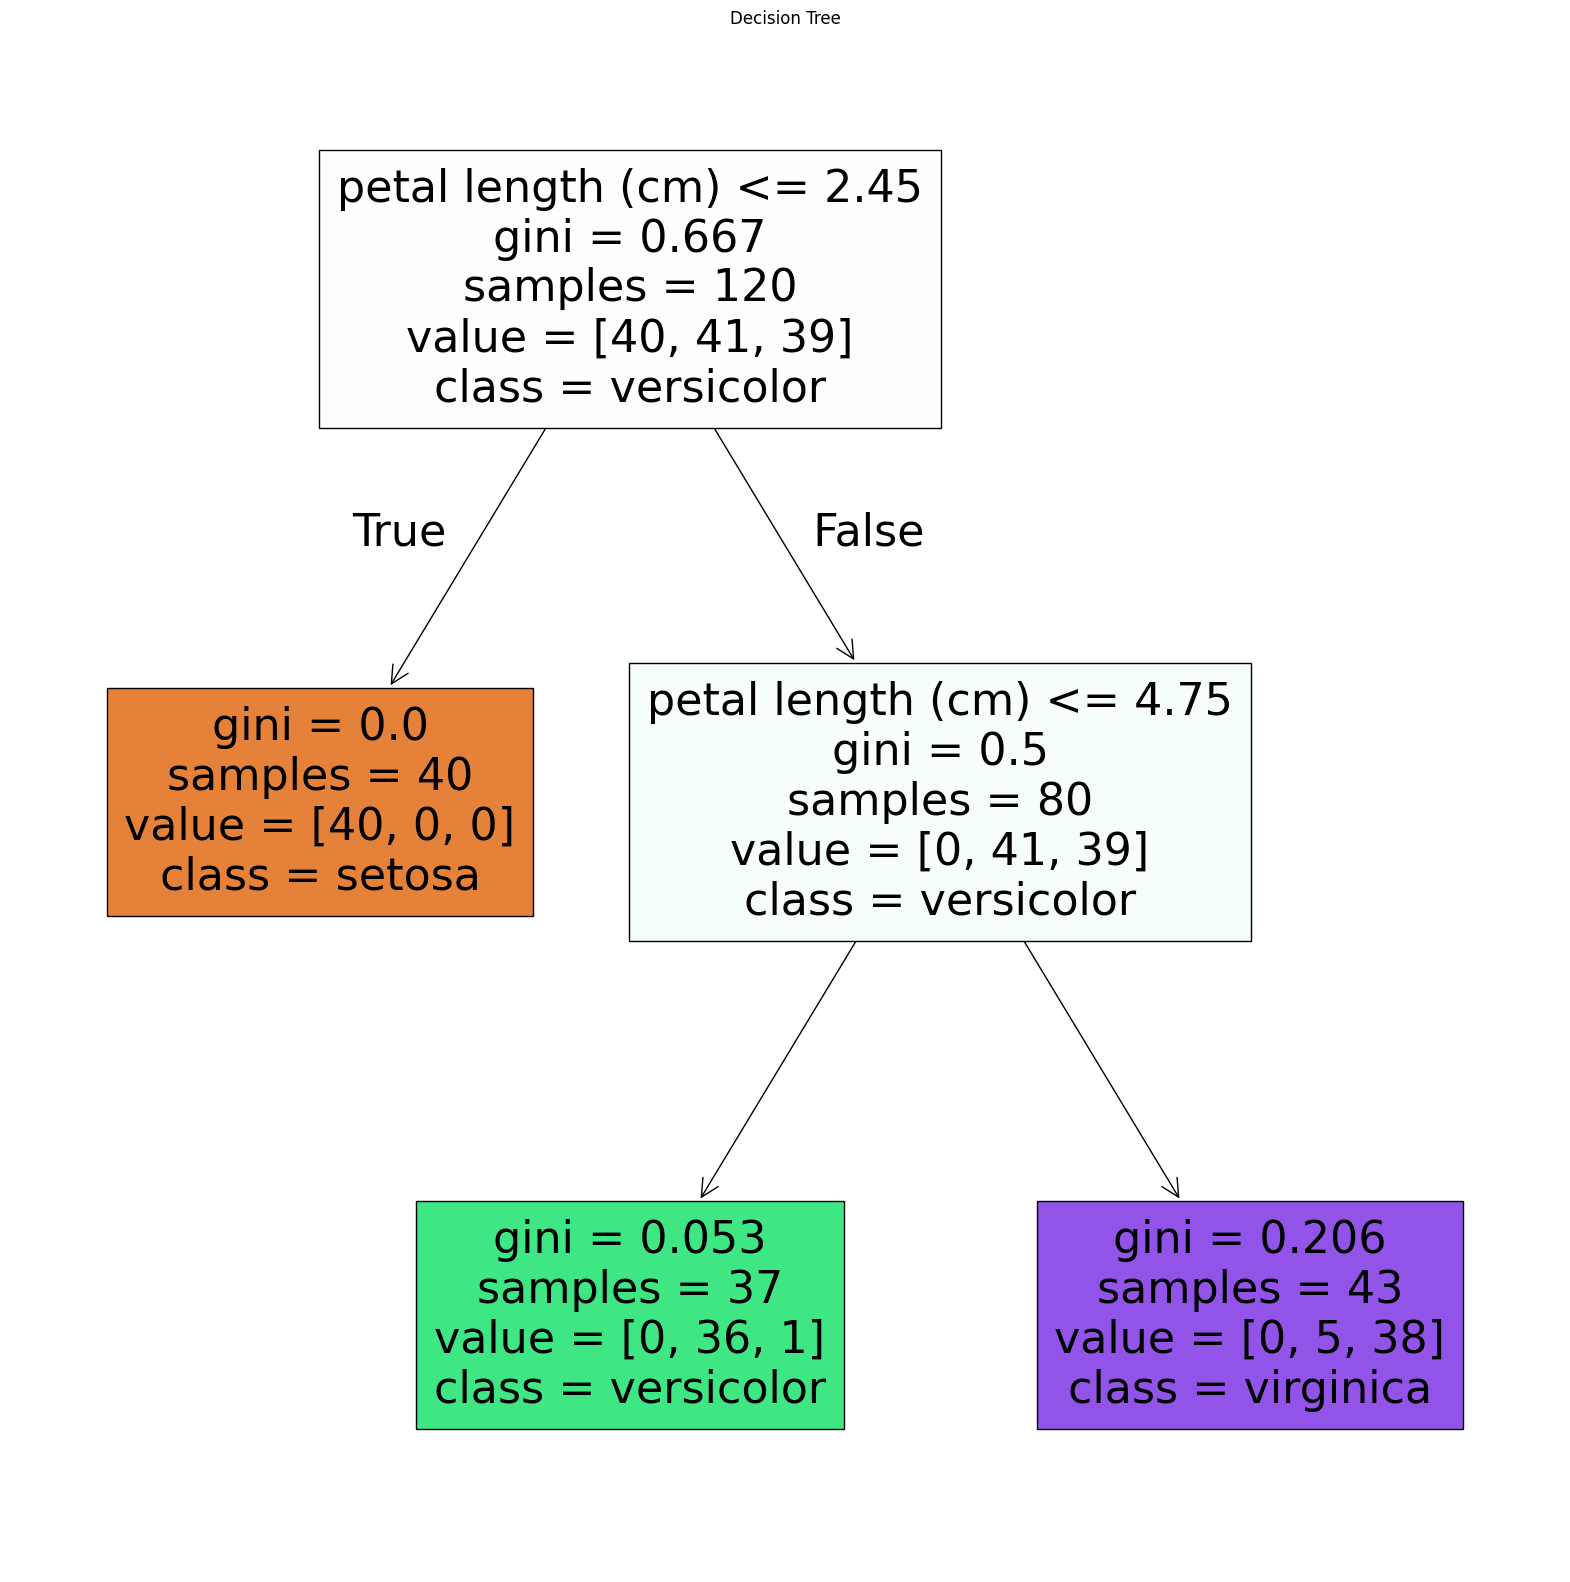

In [69]:
# visualizing the decision tree
from sklearn.tree import plot_tree

plt.figure(figsize=(20,20))
plot_tree(decision_tree, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title('Decision Tree')
plt.show()


**Save the Model:**
   - Save the trained models for future use.
   - Use libraries such as `joblib` or `pickle`.

**Documentation:**
    - Document the entire process, including data preprocessing steps, model selection, and evaluation results.